In [3]:
from google.colab import files
uploaded= files.upload()

Saving survey_results_public.csv to survey_results_public.csv


In [5]:
import pandas as pd
df= pd.read_csv("survey_results_public.csv") #using pandas to read the csv file
df.head() #view top 5 rows of the data frame

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df.columns.tolist() #view all the columns in the data frame



Rows: 65437, Columns: 114


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [7]:
df = df[['Country', 'YearsCodePro',
         'LanguageHaveWorkedWith', 'ConvertedCompYearly']]
df= df.dropna(subset=['ConvertedCompYearly'])
df=df[df['ConvertedCompYearly']>0]

df=df[df['ConvertedCompYearly']<500000]

df.head()

,Country,YearsCodePro,LanguageHaveWorkedWith,ConvertedCompYearly
72,Pakistan,1,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,7322.0
374,Austria,6,C;C++;Fortran;MATLAB;Python;SQL,30074.0
379,Turkey,6,JavaScript;Julia;Python;SQL;TypeScript,91295.0
385,France,17,Python,53703.0
389,United States of America,7,HTML/CSS;JavaScript;Python;SQL;TypeScript,110000.0


In [8]:
def clean_experience(x):
  if x == 'Less than 1 year':
    return 0
  elif x== 'More than 50 years':
    return 50
  else:
    try:
      return float(x)
    except:
      return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [9]:
df['IsPython']=df['LanguageHaveWorkedWith'].apply(lambda x: 1 if pd.notnull(x) and 'Python' in x else 0)
df['IsJava'] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if pd.notnull(x) and 'Java' in x else 0)
df['IsCloud'] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if pd.notnull(x) and ('AWS' in x or 'Azure' in x or 'GCP' in x) else 0)

In [10]:
python_salary= df[df['IsPython']== 1]['ConvertedCompYearly'].mean()
java_salary= df[df['IsJava']==1]['ConvertedCompYearly'].mean()

print(f"Python Dev Average Salary: ${python_salary:,.2f}")
print(f"Java Dev Average Salary: ${java_salary:,.2f}")

Python Dev Average Salary: $82,264.26
Java Dev Average Salary: $76,543.89


In [11]:
# Average salary by country (top 10)
country_salary= df.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)
print(country_salary)

Country
United States of America                                151036.952982
Singapore                                               136150.472727
Antigua and Barbuda                                     126120.000000
Andorra                                                 123517.000000
Switzerland                                             118554.660622
Israel                                                  112699.041096
Luxembourg                                              100471.055556
Australia                                                99315.978346
United Kingdom of Great Britain and Northern Ireland     96928.161711
Ireland                                                  96823.462810
Name: ConvertedCompYearly, dtype: float64


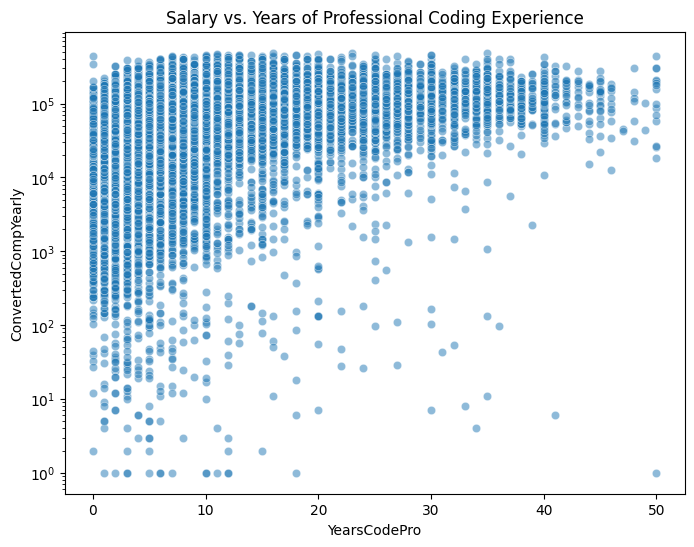

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=df, alpha=0.5)
plt.title("Salary vs. Years of Professional Coding Experience")
plt.yscale('log')
plt.show()


In [13]:
df_lang_salary= df[['LanguageHaveWorkedWith', 'ConvertedCompYearly']]

df_lang_Salary= df_lang_salary.dropna()

df_lang_salary['LanguageHaveWorkedWith']= df_lang_salary['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

df_lang_salary= df_lang_salary.explode('LanguageHaveWorkedWith')

language_Salary= df_lang_salary.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().sort_values(ascending= False)

language_Salary.head(10)

/tmp/ipython-input-13-273348346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang_salary['LanguageHaveWorkedWith']= df_lang_salary['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])


,ConvertedCompYearly
LanguageHaveWorkedWith,
Erlang,113071.186667
Clojure,110776.601156
Elixir,107983.320883
Ruby,104372.939706
Scala,101281.110294
Perl,99593.610714
Lisp,97535.109635
F#,97510.777251
Apex,95305.381910


/tmp/ipython-input-14-1369349876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


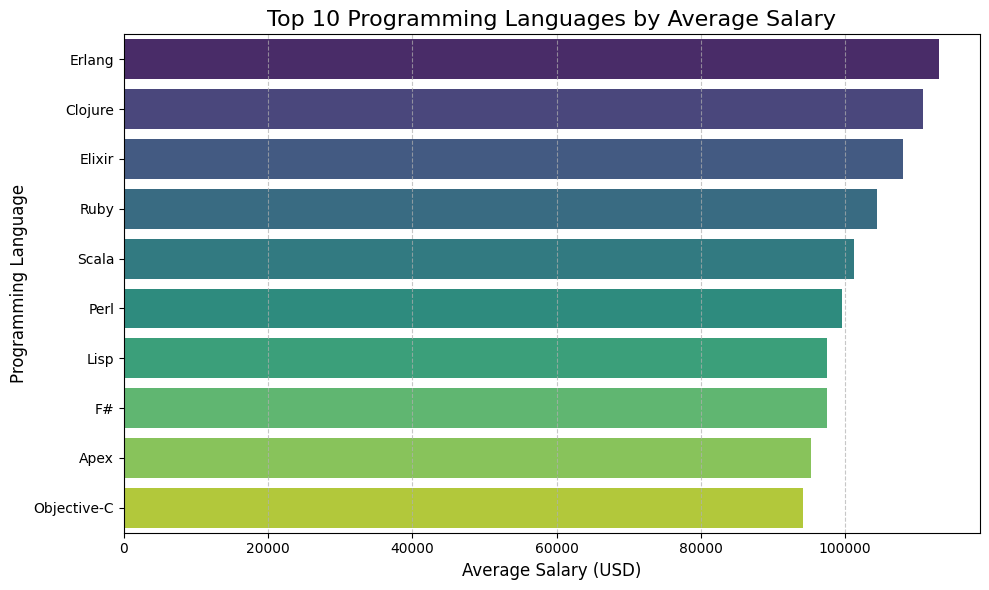

In [14]:
# Group and calculate average salary
language_salary = df_lang_salary.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Select Top 10 highest paying languages
top_languages = language_salary.head(10)

# Set plot size
plt.figure(figsize=(10,6))

# Create horizontal barplot
sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette="viridis"
)

# Add titles and labels
plt.title("Top 10 Programming Languages by Average Salary", fontsize=16)
plt.xlabel("Average Salary (USD)", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis for large numbers
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

plt.show()


In [16]:
# Clean dataset with key columns for dashboard
dashboard_df = df[['Country',
                   'YearsCodePro',
                   'ConvertedCompYearly',
                   'LanguageHaveWorkedWith']].copy()

# Clean YearsCodePro column
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 50
    else:
        try:
            return float(x)
        except:
            return None

dashboard_df['YearsCodePro'] = dashboard_df['YearsCodePro'].apply(clean_experience)

# Drop rows with missing salary or experience
dashboard_df = dashboard_df.dropna(subset=['ConvertedCompYearly', 'YearsCodePro'])

# Remove outliers (Optional: salaries over 500,000)
dashboard_df = dashboard_df[dashboard_df['ConvertedCompYearly'] < 500000]

# Save to CSV for dashboard tools
dashboard_df.to_csv("cleaned_dashboard_data.csv", index=False)


from google.colab import files
files.download("cleaned_dashboard_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>